In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv('Topic_Survey_Assignment.csv')
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [97]:
df.shape

(6, 3)

To create this bar chart, you can follow the following steps:

- Sort the dataframe in descending order of Very interested.
- Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
- As for the chart:
- use a figure size of (20, 8),
- bar width of 0.8,
- use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
- use font size 14 for the bar labels, percentages, and legend,
- use font size 16 for the title, and,
- display the percentages above the bars as shown above, and remove the left, top, and right borders.

In [98]:
df=df.sort_values(by='Very interested', ascending=False)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [99]:
df['Very interested']=round(df['Very interested']/2233,2)
df['Somewhat interested']=round(df['Somewhat interested']/2233,2)
df['Not interested']=round(df['Not interested']/2233,2)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06


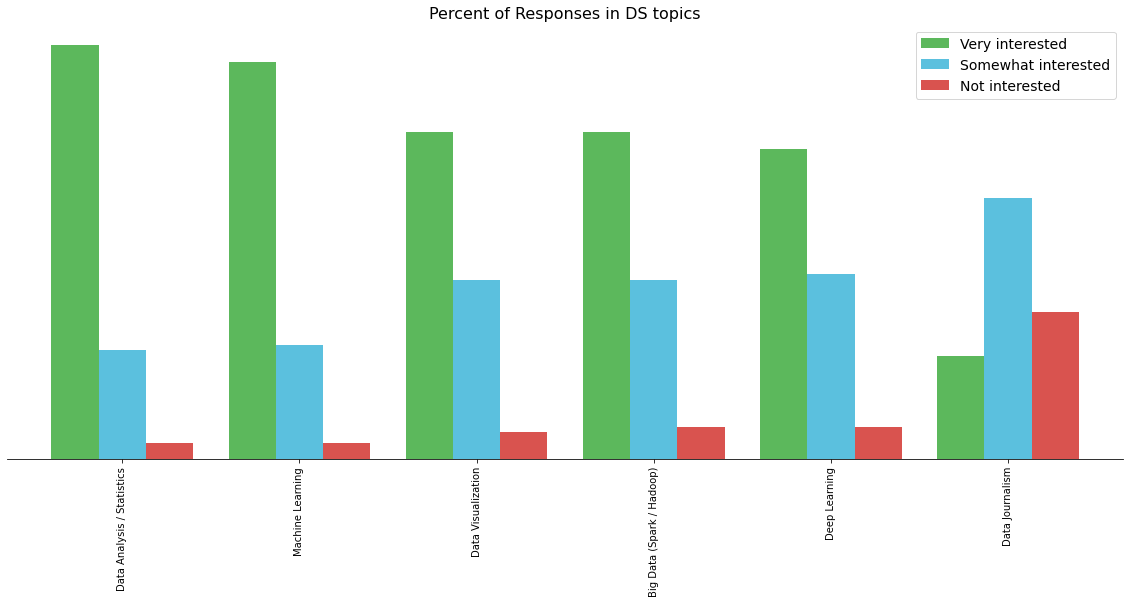

In [141]:
df.plot(kind='bar', figsize=(20, 8),
        color=['#5cb85c', '#5bc0de', '#d9534f'],
        width=0.8)

plt.legend(fontsize=14, loc='upper right')
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Percent of Responses in DS topics',fontsize=16)

plt.show()

In the final lab, we created a map with markers to explore **crime rate in San Francisco, California**. In this question, you are required to create **a Choropleth map** to visualize **crime in San Francisco**.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes(including all the 39 crime type categories).

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

Central,
Southern,
Bayview,
Mission,
Park,
Richmond,
Ingleside,
Taraval,
Northern, and,
Tenderloin.

In [142]:
crime=pd.read_csv('Police_Department_Incidents_Previous_Year_2016.csv')
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [186]:
crime_df=crime[['IncidntNum','PdDistrict']]
crime_df

,IncidntNum,PdDistrict
0,120058272,SOUTHERN
1,120058272,SOUTHERN
2,141059263,BAYVIEW
3,160013662,TENDERLOIN
4,160002740,MISSION
...,...,...
150495,161061000,PARK
150496,176000742,CENTRAL
150497,176000758,CENTRAL
150498,176000764,CENTRAL


In [208]:
df_grp=crime_df['PdDistrict'].value_counts().to_frame()
df_grp.index.rename('Neighborhood', inplace=True)
df_grp.rename(columns={'PdDistrict':'Count'},inplace=True)
df_grp

,Count
Neighborhood,
SOUTHERN,28445
NORTHERN,20100
MISSION,19503
CENTRAL,17666
BAYVIEW,14303
INGLESIDE,11594
TARAVAL,11325
TENDERLOIN,9942
RICHMOND,8922


As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco.
For the map, make sure that:

it is centred around San Francisco,
you use a zoom level of 12,
you use fill_color = 'YlOrRd',
you define fill_opacity = 0.7,
you define line_opacity=0.2, and,
you define a legend and use the default threshold scale.